In [1]:
!pip install pandas_datareader
!pip install yfinance


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
start = '2011-01-01'
end = '2023-01-01'

stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)



In [6]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2011-01-03 00:00:00+00:00,15.015455,15.052330,15.083214,14.856315,14.856315,94962614
1,2011-01-04 00:00:00+00:00,14.960049,14.996788,15.097909,14.946975,15.083962,73253547
2,2011-01-05 00:00:00+00:00,15.132727,15.169890,15.201272,14.945232,14.945730,101671667
3,2011-01-06 00:00:00+00:00,15.242792,15.280226,15.403016,15.194298,15.209989,82620526
4,2011-01-07 00:00:00+00:00,15.315838,15.353451,15.398533,15.196291,15.340251,84363033
...,...,...,...,...,...,...,...
3015,2022-12-23 00:00:00+00:00,89.589981,89.809998,90.099998,87.620003,87.620003,17815000
3016,2022-12-27 00:00:00+00:00,87.714592,87.930000,89.500000,87.535004,89.309998,15470900
3017,2022-12-28 00:00:00+00:00,86.248192,86.459999,88.519997,86.370003,87.500000,17879600


In [7]:
ma_100_days=data.Close.rolling(100).mean()


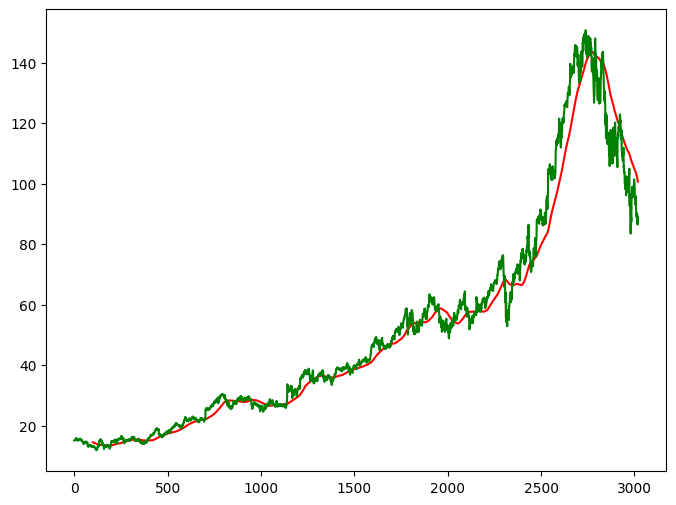

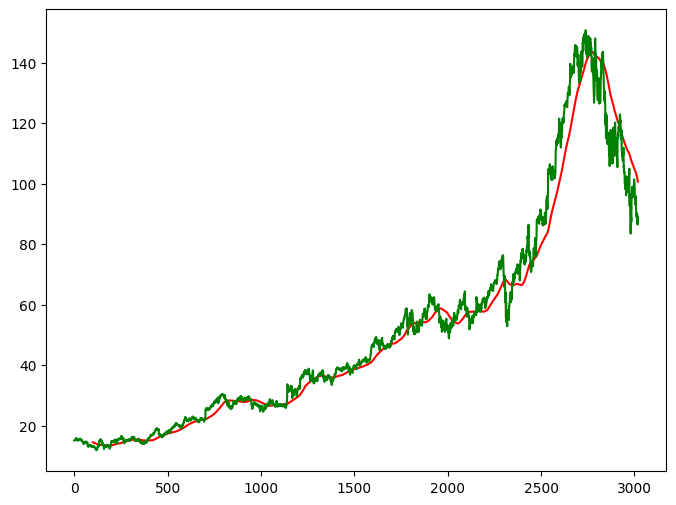

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

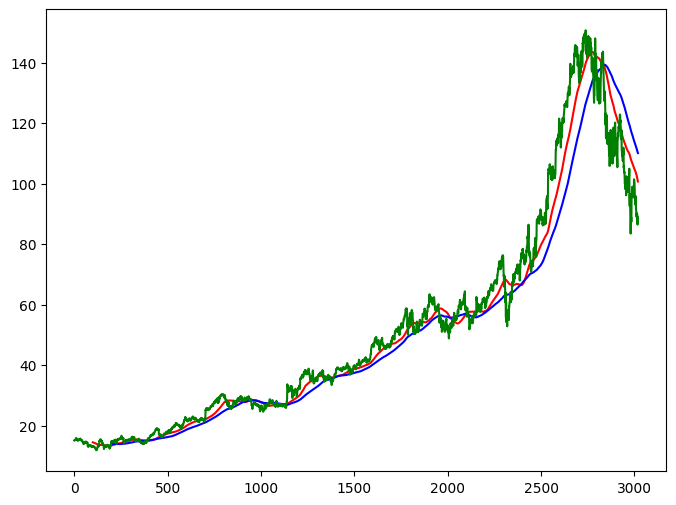

In [10]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0:int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80):len(data)])

In [14]:

data_test.shape[0]

604

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x),np.array(y)


In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
model= Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam' ,loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=40, batch_size=32,verbose=1)

Epoch 1/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - loss: 0.0801
Epoch 2/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 0.0089
Epoch 3/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - loss: 0.0080
Epoch 4/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - loss: 0.0063
Epoch 5/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 24s 330ms/step - loss: 0.0064
Epoch 6/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 288ms/step - loss: 0.0053
Epoch 7/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 314ms/step - loss: 0.0056
Epoch 8/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 0.0046
Epoch 9/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - loss: 0.0051
Epoch 10/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - loss: 0.0048
Epoch 11/40


KeyboardInterrupt: 